### Task 1: Improve the image quality by applying brightness and contrast enhancement techniques.

In [4]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

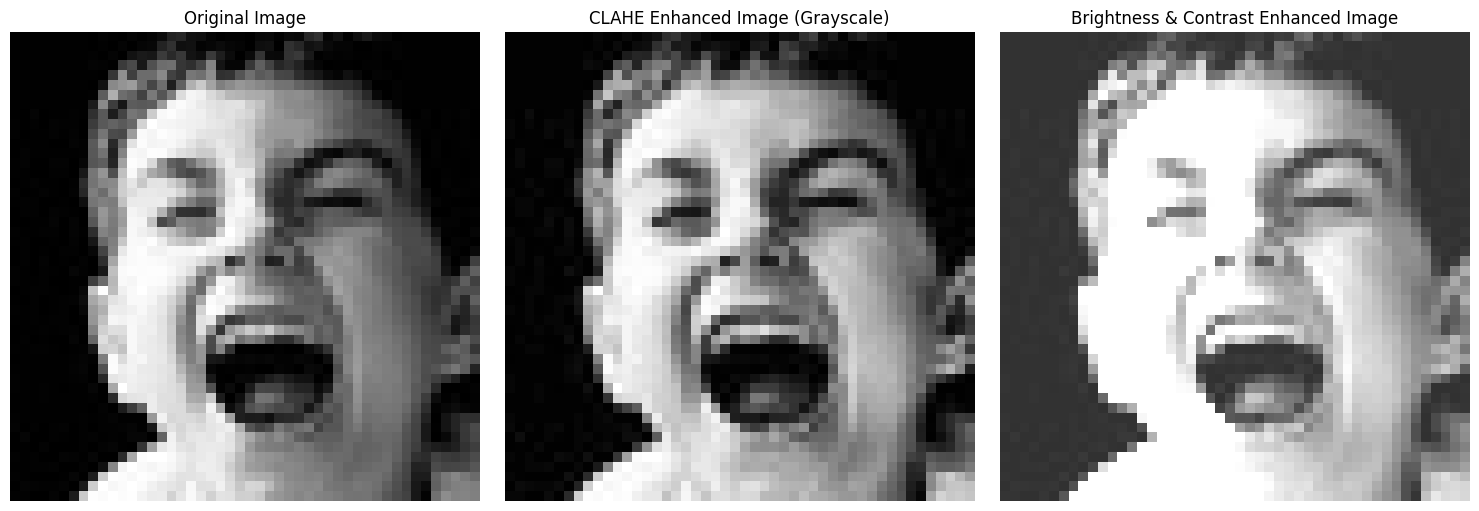

In [6]:
# Load the image
image_path = "face2.jpg"
image = cv2.imread(image_path)

# Convert to Grayscale for CLAHE
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Covert CLAHE on Grayscale Image
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16)) 
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)) 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4)) 
enhanced_image = clahe.apply(gray_image)

# brightness and contrast function
def brightness_contrast(img, brightness=30, contrast=30):
    brightness = brightness / 100.0
    contrast = contrast / 100.0
    
    # calculate mean intensity
    mean_intensity = np.mean(img)
    
    # Scale contrast around the mean intensity
    ad_img = (img - mean_intensity) * (1 + contrast) + mean_intensity + brightness * 255
    ad_img = np.clip(ad_img, 0, 255).astype(np.uint8)  
    return ad_img

# Using the function
final_img = brightness_contrast(image, brightness=30, contrast=30)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('CLAHE Enhanced Image (Grayscale)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.title('Brightness & Contrast Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

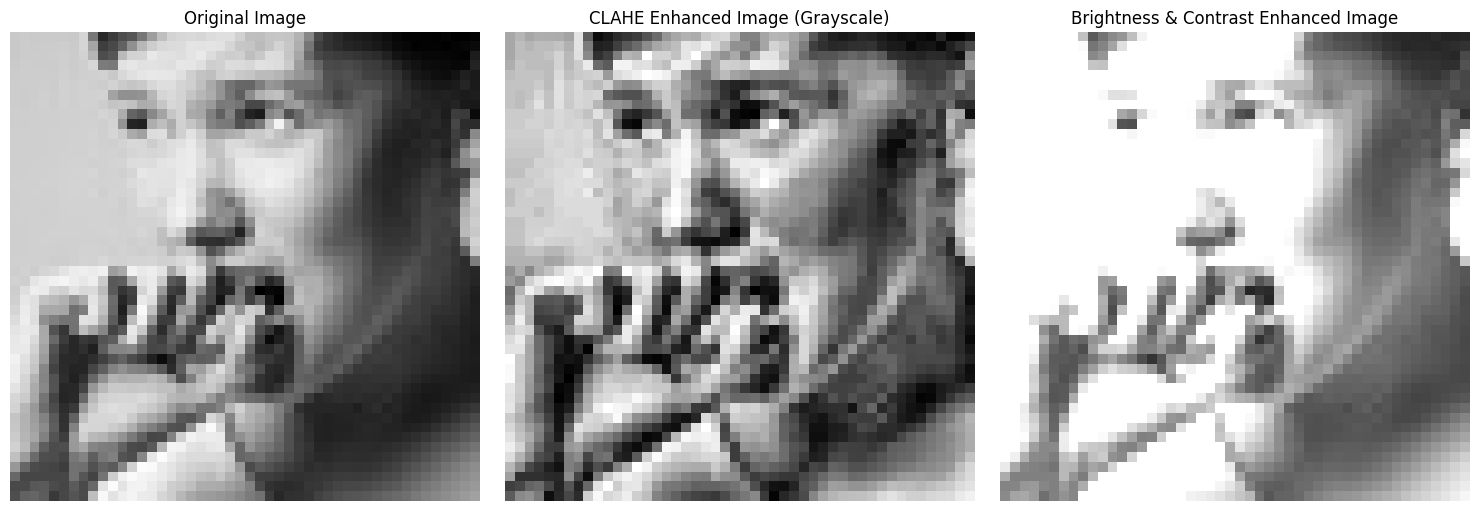

In [8]:
# Load the image
image_path = "face3.jpg"
image = cv2.imread(image_path)

# Convert to Grayscale for CLAHE
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#Covert CLAHE on Grayscale Image
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16)) 
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8)) 
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4)) 
enhanced_image = clahe.apply(gray_image)

# brightness and contrast function
def brightness_contrast(img, brightness=30, contrast=30):
    brightness = brightness / 100.0
    contrast = contrast / 100.0
    
    # calculate mean intensity
    mean_intensity = np.mean(img)
    
    # Scale contrast around the mean intensity
    ad_img = (img - mean_intensity) * (1 + contrast) + mean_intensity + brightness * 255
    ad_img = np.clip(ad_img, 0, 255).astype(np.uint8)  
    return ad_img

# Using the function
final_img = brightness_contrast(image, brightness=30, contrast=30)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(enhanced_image, cmap='gray')
plt.title('CLAHE Enhanced Image (Grayscale)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.title('Brightness & Contrast Enhanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Task 2: Segment facial features to isolate eyes, mouth, and other key components.

## Skip

### Task 3: Detect edges to analyze facial structures and expressions.

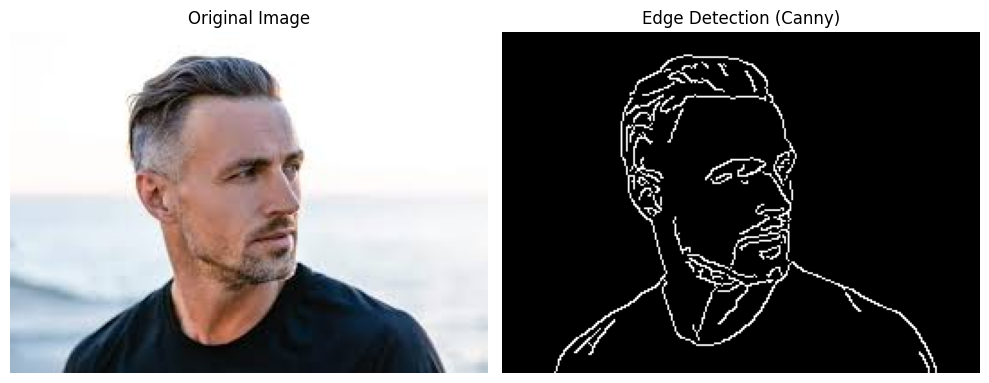

In [15]:
import cv2 as cv
# Load the image
image_path = "face5.jpeg"
image = cv.imread(image_path)

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# using Gaussian Blur 
blurred = cv.GaussianBlur(gray, (5, 5), 0)

# Canny Edge Detection
edges = cv.Canny(blurred, threshold1=50, threshold2=150)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()

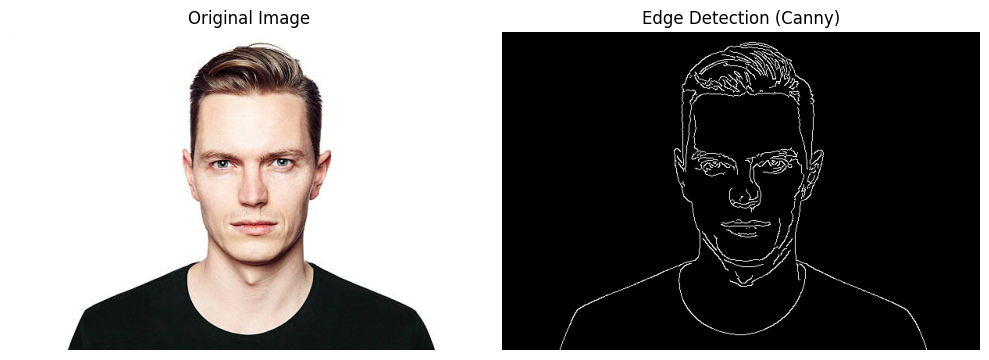

In [17]:
# Load the image
image_path = "face4.jpg"
image = cv.imread(image_path)

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# using Gaussian Blur 
blurred = cv.GaussianBlur(gray, (5, 5), 0)

# Canny Edge Detection
edges = cv.Canny(blurred, threshold1=50, threshold2=150)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny)')
plt.axis('off')

plt.tight_layout()
plt.show()

### Task 4: Use image blurring to soften non-essential features while keeping the focus on facial expressions.

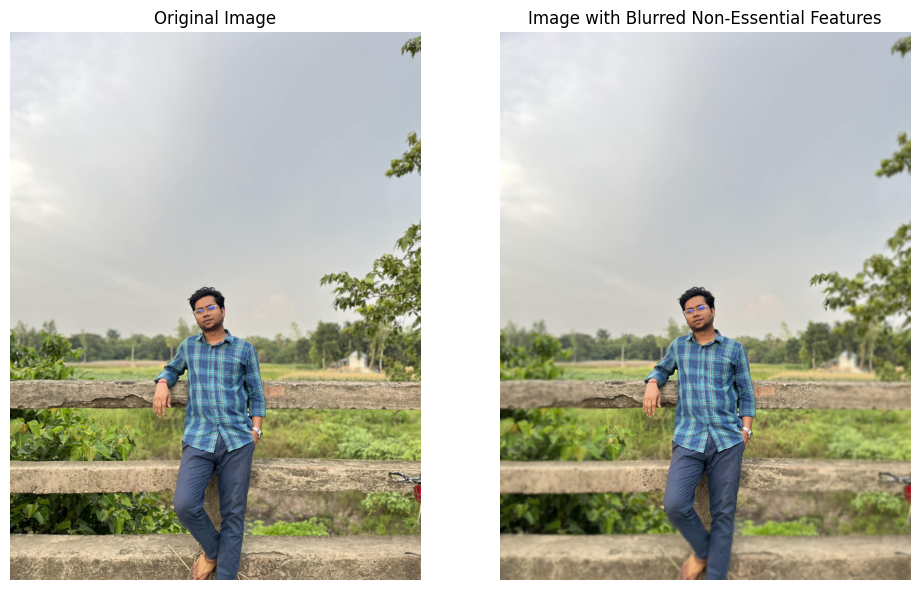

In [20]:
# Load the image
image_path = 'me1.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Using Gaussian Blur
blurred_image = cv2.GaussianBlur(image_rgb, (21, 21), 0)

# masking
mask = np.zeros_like(gray)
height, width = gray.shape

center_x, center_y = width // 2, height // 2
cv2.ellipse(mask, (center_x, center_y), (int(width * 0.3), int(height * 0.4)), 0, 0, 360, 255, -1)

# inverse the mask
mask_inv = cv2.bitwise_not(mask)

# Extract sharp and blurred region
focused_face = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
blurred_background = cv2.bitwise_and(blurred_image, blurred_image, mask=mask_inv)

# finally Combine blurred region
final_image = cv2.add(focused_face, blurred_background)


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.title("Image with Blurred Non-Essential Features")
plt.axis('off')

plt.tight_layout()
plt.show()